In [1]:
#!pip install marketing_attribution_models

In [2]:
from marketing_attribution_models import MAM

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('dataset_new.csv')

In [5]:
display(data.shape)
data.head()

(184882, 9)

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric
0,hVFl1B9VCClNRvIkpxOUfhB9P/6a832e1Dc2ZX+YGNDCah...,North Dakota,no medium,0,2023-01-21,10:33,NaN,NaN,34.0
1,KBEwoksttJ+YiA6EFk0EiR5d7LIfHYuTcD9jFLFgG/a2gr...,Maryland,no medium,0,2023-01-23,22:53,NaN,NaN,20.0
2,S27mHCNkECsdX3td8QrOEplOyacPaiMNSnSiYkrPyIq7Xe...,New Jersey,no medium,0,2023-01-24,11:39,NaN,NaN,30.0
3,1AkFYd/UnL/x3YVszCg6XQdvR0vrzdb37m809BpOSpqeZJ...,Nevada,no medium,0,2023-01-24,15:03,NaN,NaN,28.0
4,w6IqLfvEa1J/i6mHkJvoNbL4/FDZM6hFOUmj7rekuj2sXe...,West Virginia,no medium,0,2023-01-05,04:58,NaN,NaN,48.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184882 entries, 0 to 184881
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_pseudo_id         184882 non-null  object 
 1   state_fill             184882 non-null  object 
 2   medium_path            184882 non-null  object 
 3   conversion_flag        184882 non-null  int64  
 4   first_touchpoint_date  184882 non-null  object 
 5   first_touchpoint_time  184882 non-null  object 
 6   conversion_date        12926 non-null   object 
 7   conversion_time        12926 non-null   object 
 8   state_fill_numeric     184677 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 12.7+ MB


# General analysis with or without conversion

In [7]:
# Reemplazar 'Other' por 'Unknown' en la columna 'state_fill'
data['state_fill'] = data['state_fill'].replace('Other', 'Unknown')

In [8]:
# Count the frequency of each state
frecuencia_estados = data['state_fill'].value_counts()

# Select the 10 most frequent states with our without conversions
top_10_estados = frecuencia_estados.head(10)

# Mostrar los resultados
top_10_estados

Unknown       45629
Kansas        15392
Texas         13961
California    11522
New York       7753
Illinois       6004
Florida        5731
Missouri       5245
Minnesota      4995
Ohio           4371
Name: state_fill, dtype: int64

In [9]:
conversion_ratio = data['conversion_flag'].mean()
print(f"Conversion Ratio: {conversion_ratio}")

Conversion Ratio: 0.0699148646163499


In [10]:
# Extract last word from each row in medium_path column
data.loc[:, 'last_medium'] = data['medium_path'].str.split(',').str[-1]

In [11]:
# Filter out people who don't convert
total_non_converted = data[data['conversion_flag'] == 0]
print("Number of people who did not convert:", total_non_converted.shape)

total_entries = len(data)
num_non_converted = len(total_non_converted)
percentage_non_converted = (num_non_converted / total_entries) * 100
print(f"Percentage of people who did not convert: {percentage_non_converted:.2f}%")


Number of people who did not convert: (171956, 10)
Percentage of people who did not convert: 93.01%


In [12]:
# Calculate the frequency of each medium in the last_medium column for non-converted individuals
non_converted_medium_frequency = total_non_converted['last_medium'].value_counts()
print(non_converted_medium_frequency)

no medium          94448
paidsocial         20960
cpc                14335
email              13603
organic            10974
affiliates          8930
referral            7687
gotoweb              947
chumba_post           58
company_profile        7
a                      3
influencer             3
affili                 1
Name: last_medium, dtype: int64


In [13]:
# Contar las ocurrencias de "no medium"
count_no_medium = data[data['medium_path'] == 'no medium'].shape[0]

# Calcular el porcentaje
percentage_no_medium = (count_no_medium / data.shape[0]) * 100

# Imprimir los resultados
print(f"Número de veces que aparece 'no medium': {count_no_medium}")
print(f"Porcentaje de 'no medium' respecto al total: {percentage_no_medium:.2f}%")


Número de veces que aparece 'no medium': 99863
Porcentaje de 'no medium' respecto al total: 54.01%


In [14]:
total_non_converted.head()

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric,last_medium
0,hVFl1B9VCClNRvIkpxOUfhB9P/6a832e1Dc2ZX+YGNDCah...,North Dakota,no medium,0,2023-01-21,10:33,NaN,NaN,34.0,no medium
1,KBEwoksttJ+YiA6EFk0EiR5d7LIfHYuTcD9jFLFgG/a2gr...,Maryland,no medium,0,2023-01-23,22:53,NaN,NaN,20.0,no medium
2,S27mHCNkECsdX3td8QrOEplOyacPaiMNSnSiYkrPyIq7Xe...,New Jersey,no medium,0,2023-01-24,11:39,NaN,NaN,30.0,no medium
3,1AkFYd/UnL/x3YVszCg6XQdvR0vrzdb37m809BpOSpqeZJ...,Nevada,no medium,0,2023-01-24,15:03,NaN,NaN,28.0,no medium
4,w6IqLfvEa1J/i6mHkJvoNbL4/FDZM6hFOUmj7rekuj2sXe...,West Virginia,no medium,0,2023-01-05,04:58,NaN,NaN,48.0,no medium


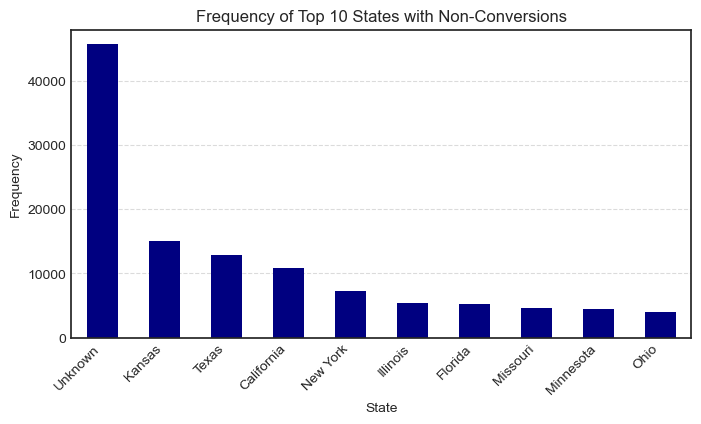

In [15]:
# Filter the DataFrame to consider only the top 10 most frequent states
top_10_states = total_non_converted['state_fill'].value_counts().head(10)
top_10_states_data = total_non_converted[total_non_converted['state_fill'].isin(top_10_states.index)]
state_frequency = top_10_states_data['state_fill'].value_counts()

plt.figure(figsize=(8, 4))
state_frequency.plot(kind='bar', color='navy')
plt.title('Frequency of Top 10 States with Non-Conversions')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


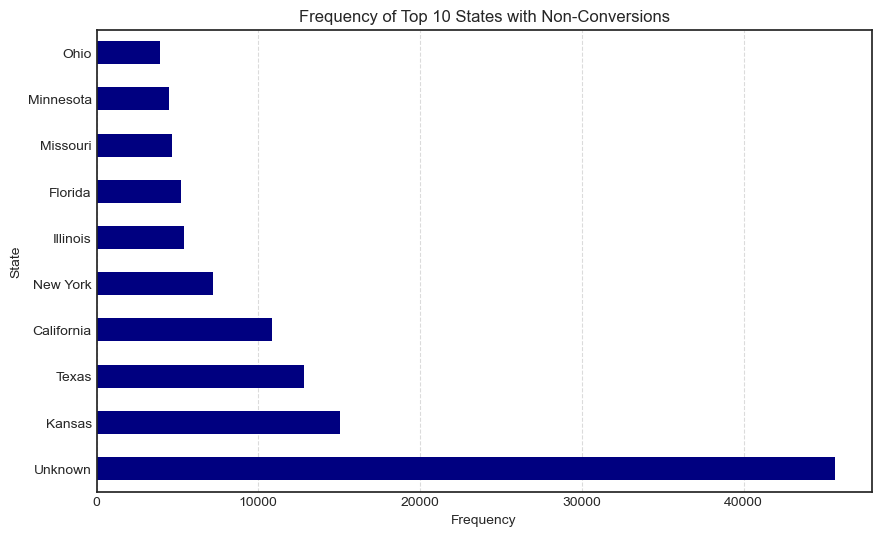

In [16]:
import matplotlib.pyplot as plt

# Filter the DataFrame to consider only the top 10 most frequent states
top_10_states = total_non_converted['state_fill'].value_counts().head(10)
top_10_states_data = total_non_converted[total_non_converted['state_fill'].isin(top_10_states.index)]

# Calculate the sum of frequency of states
state_frequency = top_10_states_data['state_fill'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
state_frequency.plot(kind='barh', color='navy')  # Set kind='barh' for horizontal bars
plt.title('Frequency of Top 10 States with Non-Conversions')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adjust grid to x-axis
plt.show()


# Analysis of channels and conversions

In [17]:
# Filter only by conversions obtained
conversion_data = data[data['conversion_flag'] == 1]

In [18]:
conversion_data.head()
conversion_data.shape

(12926, 10)

In [19]:
# Calculate the average number of days that pass between the first contact and the conversion

conversion_data['first_touchpoint_date'] = pd.to_datetime(conversion_data['first_touchpoint_date'])
conversion_data['conversion_date'] = pd.to_datetime(conversion_data['conversion_date'])
conversion_data['days_to_conversion'] = (conversion_data['conversion_date'] - conversion_data['first_touchpoint_date']).dt.days
average_days_to_conversion = conversion_data['days_to_conversion'].mean()
print(f"Average days to conversion: {average_days_to_conversion:.2f} days")


Average days to conversion: 2.39 days


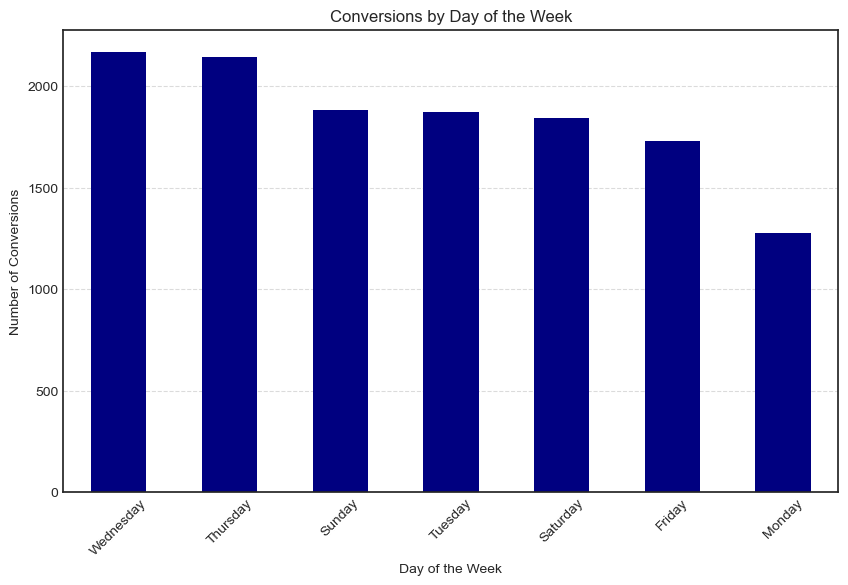

In [20]:
conversion_data['day_of_week'] = conversion_data['conversion_date'].dt.day_name()
conversion_by_day = conversion_data['day_of_week'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
conversion_by_day.plot(kind='bar', color='navy')
plt.title('Conversions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Conversions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#for i in range(len(conversion_by_day)):
  #  plt.text(i, conversion_by_day[i] - 80, conversion_by_day[i], ha='center', color='white')
plt.show()


In [21]:
# Frequency of last channel in contact before conversion
conversion_data['last_medium'].value_counts()

no medium          5415
organic            2325
email              1923
cpc                1529
affiliates         1008
referral            402
paidsocial          165
gotoweb             153
company_profile       4
chumba_post           2
Name: last_medium, dtype: int64

In [22]:
ratio = 5415 / 2325
print(f'The frequency of "no medium" is approximately {ratio:.2f} times greater than the frequency of "organic".')

The frequency of "no medium" is approximately 2.33 times greater than the frequency of "organic".


In [23]:
# Identify the top 10 states with conversions

conv_state_frequency = conversion_data['state_fill'].value_counts()
top_10_states_conv = conv_state_frequency.head(10)
top_10_states_conv

Texas         1108
California     706
Illinois       628
New York       554
Missouri       552
Florida        528
Minnesota      508
Ohio           419
Tennessee      401
Virginia       383
Name: state_fill, dtype: int64

In [24]:
# Calculate the conversion percentage for each state

conversion_percentage_by_state = (top_10_states_conv / 12926) * 100
conversion_percentage_by_state

Texas         8.571871
California    5.461860
Illinois      4.858425
New York      4.285935
Missouri      4.270463
Florida       4.084790
Minnesota     3.930063
Ohio          3.241529
Tennessee     3.102274
Virginia      2.963020
Name: state_fill, dtype: float64

In [25]:
# I want to know the average in Texas states with the highest conversions

texas_data = conversion_data[conversion_data['state_fill'] == 'Texas']
frecuencia_medium_texas = texas_data['last_medium'].value_counts()
print(frecuencia_medium_texas)


no medium      466
organic        186
email          177
cpc            122
affiliates      86
referral        42
gotoweb         15
paidsocial      13
chumba_post      1
Name: last_medium, dtype: int64


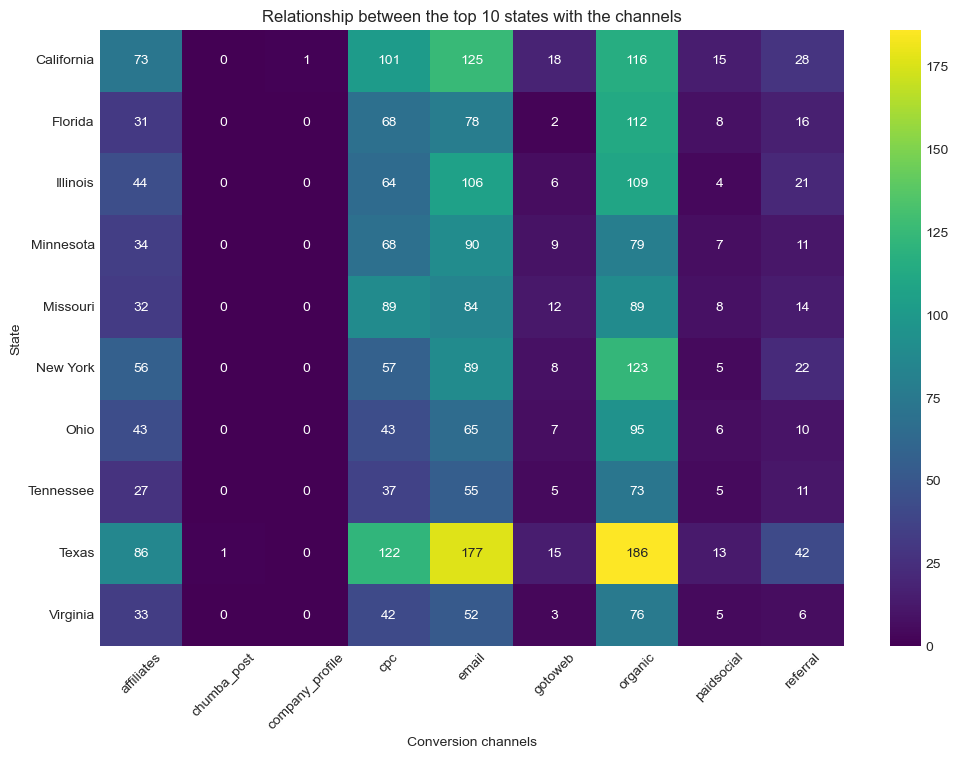

In [26]:
# Search if there is a correlation between the top 10 states with the highest conversions and the channels

top_10_estados = conversion_data['state_fill'].value_counts().head(10).index.tolist()
top_10_data = conversion_data[conversion_data['state_fill'].isin(top_10_estados)]
top_10_data = top_10_data[top_10_data['last_medium'] != 'no medium']
contingency_table = pd.crosstab(top_10_data['state_fill'], top_10_data['last_medium'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Relationship between the top 10 states with the channels')
plt.xlabel('Conversion channels')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [27]:
# Calculate the conversion rate for each state in the top 10 that convert the least

conversions_by_state = conversion_data.groupby('state_fill')['conversion_flag'].sum()
conversions_by_state_asc = conversions_by_state.sort_values(ascending=True)
top_10_states_menos_conv = conversions_by_state_asc.head(10)
porcentaje_conversions_by_state_menos_conv = (top_10_states_menos_conv / 12926) * 100
print(porcentaje_conversions_by_state_menos_conv)


state_fill
Unknown                 0.007736
Alaska                  0.069627
Hawaii                  0.162463
Rhode Island            0.177936
District of Columbia    0.177936
Delaware                0.286245
Vermont                 0.371345
Wyoming                 0.464181
Montana                 0.479653
New Jersey              0.502862
Name: conversion_flag, dtype: float64


In [28]:
def custom_attribution_model(data):
    num_touchpoints = len(data)
    first_touchpoint_credit = 30
    last_touchpoint_credit = 40
    intermediate_touchpoint_credit = (100 - first_touchpoint_credit - last_touchpoint_credit) / (num_touchpoints - 2)

    attribution_credits = []

    attribution_credits.append(first_touchpoint_credit)
    for i in range(1, num_touchpoints - 1):
        attribution_credits.append(intermediate_touchpoint_credit)
    attribution_credits.append(last_touchpoint_credit)

    data['attribution_credit'] = attribution_credits
    return data

custom_attributions = custom_attribution_model(conversion_data)
custom_attributions

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric,last_medium,days_to_conversion,day_of_week,attribution_credit
8,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Maryland,no medium,1,2022-12-27,19:00,2023-01-23,09:16,20.0,no medium,27,Monday,30.000000
9,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Delaware,no medium,1,2022-12-27,19:00,2023-01-23,09:16,8.0,no medium,27,Monday,0.002321
10,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,West Virginia,no medium,1,2022-12-27,19:00,2023-01-23,09:16,48.0,no medium,27,Monday,0.002321
11,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Ohio,no medium,1,2022-12-27,19:00,2023-01-23,09:16,35.0,no medium,27,Monday,0.002321
12,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Florida,no medium,1,2022-12-27,19:00,2023-01-23,09:16,9.0,no medium,27,Monday,0.002321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184563,1npxlqjkdhUrizbON94aysR22EkyldRlwVn+a2SDRYrnma...,South Carolina,"referral,referral,email,email,email",1,2023-01-01,07:34,2023-01-24,06:51,40.0,email,23,Tuesday,0.002321
184568,+tX2PtuQg0OHAh5sXsVa/abyXahpgiQEyK8X0sd8XpqzQT...,South Carolina,no medium,1,2022-12-29,23:03,2022-12-29,23:05,40.0,no medium,0,Thursday,0.002321
184712,Yi+IFaG/NrEbBQNsAYzlVnk06ty5X6gFFZ2lSc4C02JYiQ...,South Carolina,affiliates,1,2023-01-11,21:10,2023-01-11,21:43,40.0,affiliates,0,Wednesday,0.002321
184773,v7v1iK7+QeDdrgQEV1scsHsPX9Gf2SL0wz+Lp4TzoUWmFY...,South Carolina,paidsocial,1,2023-01-12,20:12,2023-01-12,20:17,40.0,paidsocial,0,Thursday,0.002321


In [29]:
# Apply filter to select only rows where 'last_medium' is different from 'no medium'
filtered_custom_attributions = custom_attributions[custom_attributions['last_medium'] != 'no medium']

In [30]:
# Select the rows with the 10 highest values in the "attribution_credit" column

top_10_custom_attributions = filtered_custom_attributions.nlargest(10, 'attribution_credit')
filtered_df = top_10_custom_attributions[['state_fill', 'conversion_date','last_medium','attribution_credit']]
filtered_df

,state_fill,conversion_date,last_medium,attribution_credit
184816,South Carolina,2023-01-03,organic,40.000000
65,New Mexico,2022-12-28,cpc,0.002321
66,Montana,2022-12-28,cpc,0.002321
67,Idaho,2022-12-28,cpc,0.002321
68,Wyoming,2022-12-28,cpc,0.002321
69,Utah,2022-12-28,cpc,0.002321
70,Texas,2022-12-28,cpc,0.002321
71,Arizona,2022-12-28,cpc,0.002321
72,Colorado,2022-12-28,cpc,0.002321
76,Idaho,2023-01-12,affiliates,0.002321


In [31]:
top_50_custom_attributions = filtered_custom_attributions.nlargest(50, 'attribution_credit')
filtered_df_50 = top_50_custom_attributions[['state_fill', 'conversion_date','last_medium','attribution_credit']]
#filtered_df_50

In [32]:
#Split the "medium_path" by channel in the journey

medium_path_split = conversion_data['medium_path'].str.split(',', expand=True)
medium_path_split.columns = [f"mp_{i+1}" for i in range(len(medium_path_split.columns))]
df = pd.concat([conversion_data, medium_path_split], axis=1)
df

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric,last_medium,...,mp_65,mp_66,mp_67,mp_68,mp_69,mp_70,mp_71,mp_72,mp_73,mp_74
8,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Maryland,no medium,1,2022-12-27,19:00,2023-01-23,09:16,20.0,no medium,...,None,None,None,None,None,None,None,None,None,None
9,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Delaware,no medium,1,2022-12-27,19:00,2023-01-23,09:16,8.0,no medium,...,None,None,None,None,None,None,None,None,None,None
10,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,West Virginia,no medium,1,2022-12-27,19:00,2023-01-23,09:16,48.0,no medium,...,None,None,None,None,None,None,None,None,None,None
11,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Ohio,no medium,1,2022-12-27,19:00,2023-01-23,09:16,35.0,no medium,...,None,None,None,None,None,None,None,None,None,None
12,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,Florida,no medium,1,2022-12-27,19:00,2023-01-23,09:16,9.0,no medium,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184563,1npxlqjkdhUrizbON94aysR22EkyldRlwVn+a2SDRYrnma...,South Carolina,"referral,referral,email,email,email",1,2023-01-01,07:34,2023-01-24,06:51,40.0,email,...,None,None,None,None,None,None,None,None,None,None
184568,+tX2PtuQg0OHAh5sXsVa/abyXahpgiQEyK8X0sd8XpqzQT...,South Carolina,no medium,1,2022-12-29,23:03,2022-12-29,23:05,40.0,no medium,...,None,None,None,None,None,None,None,None,None,None
184712,Yi+IFaG/NrEbBQNsAYzlVnk06ty5X6gFFZ2lSc4C02JYiQ...,South Carolina,affiliates,1,2023-01-11,21:10,2023-01-11,21:43,40.0,affiliates,...,None,None,None,None,None,None,None,None,None,None
184773,v7v1iK7+QeDdrgQEV1scsHsPX9Gf2SL0wz+Lp4TzoUWmFY...,South Carolina,paidsocial,1,2023-01-12,20:12,2023-01-12,20:17,40.0,paidsocial,...,None,None,None,None,None,None,None,None,None,None


In [33]:
# Filter only by conversions obtained
df_m = df.loc[df['medium_path'] != 'no medium'].copy()

In [34]:
# Count the number of steps they took to convert
df_m['journey_steps'] = df_m.filter(like='mp').count(axis=1)
df_m

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric,last_medium,...,mp_66,mp_67,mp_68,mp_69,mp_70,mp_71,mp_72,mp_73,mp_74,journey_steps
65,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,New Mexico,cpc,1,2022-12-28,01:26,2022-12-28,22:56,31.0,cpc,...,None,None,None,None,None,None,None,None,None,1
66,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Montana,cpc,1,2022-12-28,01:26,2022-12-28,22:56,26.0,cpc,...,None,None,None,None,None,None,None,None,None,1
67,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Idaho,cpc,1,2022-12-28,01:26,2022-12-28,22:56,12.0,cpc,...,None,None,None,None,None,None,None,None,None,1
68,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Wyoming,cpc,1,2022-12-28,01:26,2022-12-28,22:56,50.0,cpc,...,None,None,None,None,None,None,None,None,None,1
69,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Utah,cpc,1,2022-12-28,01:26,2022-12-28,22:56,44.0,cpc,...,None,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184561,lNsGK+ijalIEm0lQqjHkbGtNMcEzwKvWXfaz9Ct5qKhyD1...,South Carolina,"affiliates,email",1,2023-01-14,21:44,2023-01-21,15:44,40.0,email,...,None,None,None,None,None,None,None,None,None,2
184563,1npxlqjkdhUrizbON94aysR22EkyldRlwVn+a2SDRYrnma...,South Carolina,"referral,referral,email,email,email",1,2023-01-01,07:34,2023-01-24,06:51,40.0,email,...,None,None,None,None,None,None,None,None,None,5
184712,Yi+IFaG/NrEbBQNsAYzlVnk06ty5X6gFFZ2lSc4C02JYiQ...,South Carolina,affiliates,1,2023-01-11,21:10,2023-01-11,21:43,40.0,affiliates,...,None,None,None,None,None,None,None,None,None,1
184773,v7v1iK7+QeDdrgQEV1scsHsPX9Gf2SL0wz+Lp4TzoUWmFY...,South Carolina,paidsocial,1,2023-01-12,20:12,2023-01-12,20:17,40.0,paidsocial,...,None,None,None,None,None,None,None,None,None,1


In [35]:
#df_m['journey_steps'].value_counts()

In [36]:
# Calculate the frequency of steps from 1 to 10
frequency_steps_1_to_10 = [(df_m['journey_steps'] == i).sum() for i in range(1, 11)]
total_steps = sum(frequency_steps_1_to_10)
step_table = pd.DataFrame({
    'Step': list(range(1, 11)),
    'Frequency': frequency_steps_1_to_10
})

step_table.loc['Total'] = ['Total', total_steps]
step_table

,Step,Frequency
0,1,4791
1,2,1260
2,3,628
3,4,313
4,5,161
5,6,99
6,7,60
7,8,32
8,9,30
9,10,26


* Analyze first touchpoint channels

In [37]:
# Calculate the frequency of each medium in 'mp_1'

frequency_mp_1 = df_m['mp_1'].value_counts()
mp_1_table = pd.DataFrame({'Medium': frequency_mp_1.index, 'Frequency': frequency_mp_1.values})
mp_1_table

,Medium,Frequency
0,organic,2326
1,cpc,1827
2,email,1649
3,affiliates,1044
4,referral,343
5,paidsocial,198
6,gotoweb,118
7,company_profile,4
8,chumba_post,2


* Most frequent channel in the last touchpoint before conversion

In [38]:
# Calculate the frequency of each medium in 'last_medium'
frequency_last_mp = df_m['last_medium'].value_counts()
last_mp_table = pd.DataFrame({'Medium': frequency_last_mp.index, 'Frequency': frequency_last_mp.values})
last_mp_table

,Medium,Frequency
0,organic,2325
1,email,1923
2,cpc,1529
3,affiliates,1008
4,referral,402
5,paidsocial,165
6,gotoweb,153
7,company_profile,4
8,chumba_post,2


In [39]:
# Find out how many people repeat the conversion by which channel

duplicados_por_canal = df[df.duplicated(subset=['user_pseudo_id', 'last_medium'], keep=False)]
duplicados_por_canal = duplicados_por_canal.groupby('last_medium')['user_pseudo_id'].count().reset_index()
duplicados_por_canal.rename(columns={'user_pseudo_id': 'duplicates_count'}, inplace=True)
duplicados_por_canal = duplicados_por_canal.sort_values(by='duplicates_count', ascending=False)
duplicados_por_canal


,last_medium,duplicates_count
5,no medium,4302
6,organic,1711
3,email,1339
2,cpc,1058
0,affiliates,744
8,referral,253
7,paidsocial,93
4,gotoweb,85
1,company_profile,4


In [40]:
# Find out how many people repeat the conversion by which channel
duplicados_por_user = df[df.duplicated(subset=['user_pseudo_id', 'last_medium'], keep=False)]
duplicados_por_user = duplicados_por_user.groupby(['user_pseudo_id', 'last_medium']).size().reset_index(name='duplicates_count')
duplicados_por_user_top10 = duplicados_por_user.sort_values(by='duplicates_count', ascending=False).head(10)
duplicados_por_user_top10

,user_pseudo_id,last_medium,duplicates_count
1221,Yc6000CqUocDcz47IdUDf2Wv/3HI4KRW7sjFQr8rBQ0NKP...,no medium,19
530,EPKyhpaNDwXV/dwYeG89395gpEBeiCkqgimx5UwYBoMi+g...,organic,19
474,CtWbnZENiRnHLXCMbFv+mLF3csyOu/CO3UQ8DOeTs2K9oM...,cpc,19
471,CmWqT6GJ/XT0WGU2VY1xglbFAwnQfeyhmaQS1SEf0tyjNX...,no medium,18
1950,v7abFlKch7Z1MoPfljoIgzs9zNn5u+vdU/THeUXfQ0UTXH...,organic,18
1985,w7m2zZm5zrlvnSxKQiuToi2su/+BQ5JAPKa7gFz2/7rohJ...,organic,18
1392,df/f1pftTu57gHrYAOTkMZWHpTZScrxYMTm9PwGBxH6qCk...,cpc,18
1407,dyWXPNHFgzIy5kn4oA8ik9+AwVoNhS30madGOxKcnnxwe/...,cpc,18
1055,TvWQe8qBSY3m615mQnNVFsohFhQWzjF/FQw0o7wl9W5FxP...,organic,17
2072,yZQ4aPNhJSdnY0IaBXl5M8EcPunIHRU7II9NbkYS+ArD/2...,email,17


In [41]:
# Calculate the maximum number of steps, the minimum and the average

max_journey_steps = df_m['journey_steps'].max()
min_journey_steps = df_m['journey_steps'].min()
avg_journey_steps = df_m['journey_steps'].mean()
summary_df = pd.DataFrame({
    'Statistic': ['Maximum', 'Minimum', 'Average'],
    'Journey Steps': [max_journey_steps, min_journey_steps, avg_journey_steps]
})

print(summary_df)


  Statistic  Journey Steps
0   Maximum      74.000000
1   Minimum       1.000000
2   Average       1.998802


In [42]:
# the total frequency with which the channel is repeated in journeys

mediums_concatenados = pd.concat([df_m[f'mp_{i}'] for i in range(1, 75)])
frecuencia_medios = mediums_concatenados.value_counts()
tabla_frecuencia = pd.DataFrame(frecuencia_medios, columns=['Frequency'])
print(tabla_frecuencia)

                 Frequency
organic               4895
email                 3149
cpc                   2723
affiliates            2294
referral              1199
gotoweb                452
paidsocial             291
company_profile          8
chumba_post              2


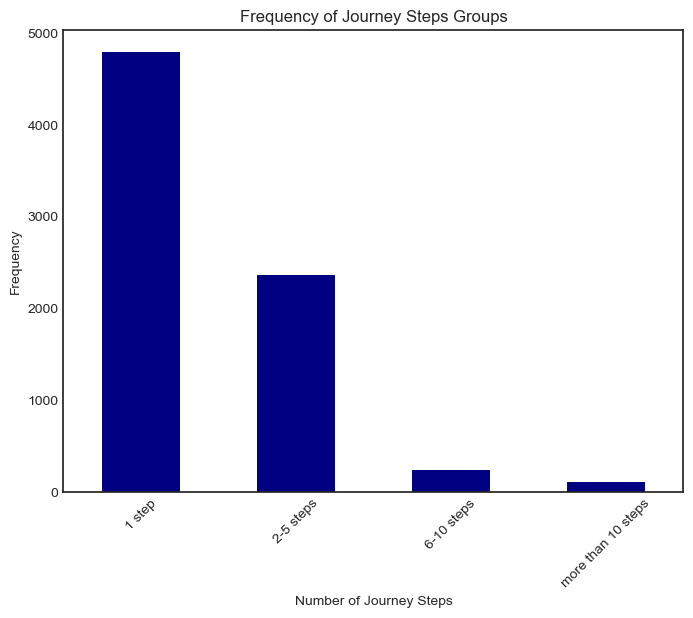

In [43]:
# Group journey_steps into categories
df_m['journey_steps_group'] = pd.cut(df_m['journey_steps'], bins=[0, 1, 5, 10, float('inf')], labels=['1 step', '2-5 steps', '6-10 steps', 'more than 10 steps'])

journey_steps_group_freq = df_m['journey_steps_group'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
journey_steps_group_freq.plot(kind='bar', color='navy')
plt.xlabel('Number of Journey Steps')
plt.ylabel('Frequency')
plt.title('Frequency of Journey Steps Groups')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Which channel is the most frequent for those who only take one step in the conversion?

df_1_step = df_m[df_m['journey_steps'] == 1]
frequency_last_medium = df_1_step['last_medium'].value_counts()
frequency_last_medium

organic        1544
cpc            1229
email          1146
affiliates      491
referral        204
paidsocial      133
gotoweb          42
chumba_post       2
Name: last_medium, dtype: int64

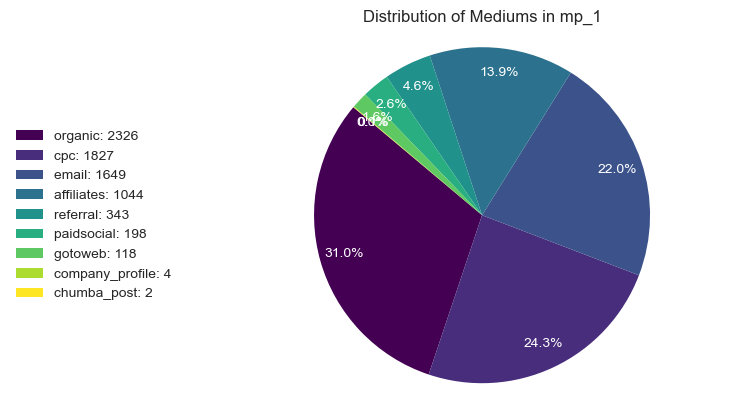

In [45]:
medium_counts = df_m['mp_1'].value_counts()

labels = medium_counts.index
sizes = medium_counts.values

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
legend_labels = [f'{label}: {sizes[i]}' for i, label in enumerate(labels)]
ax.legend(wedges, legend_labels, loc='center right', bbox_to_anchor=(-0.1, 0.5))
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribution of Mediums in mp_1')
plt.show()


In [46]:
df_m['mp_1'].value_counts()

organic            2326
cpc                1827
email              1649
affiliates         1044
referral            343
paidsocial          198
gotoweb             118
company_profile       4
chumba_post           2
Name: mp_1, dtype: int64

In [47]:
df_m['last_medium'].value_counts()

organic            2325
email              1923
cpc                1529
affiliates         1008
referral            402
paidsocial          165
gotoweb             153
company_profile       4
chumba_post           2
Name: last_medium, dtype: int64

In [48]:
# What combination of start and end channels has the highest frequency?

df_m['start_end_medium'] = df_m['mp_1'] + '_' + df_m['last_medium']
frecuencia_combinaciones = df_m['start_end_medium'].value_counts()
combinacion_mas_frecuente = frecuencia_combinaciones.idxmax()
frecuencia_mas_frecuente = frecuencia_combinaciones.max()
print(f"Most frequent combination of mediums at start and end: {combinacion_mas_frecuente}")
print(f"Frequency: {frecuencia_mas_frecuente}")


Most frequent combination of mediums at start and end: organic_organic
Frequency: 2039


In [49]:
df_m['conversion_date'] = pd.to_datetime(df_m['conversion_date'])

# Agregar una nueva columna 'day_week' que contenga el nombre del día de la semana
df_m['day_week'] = df_m['conversion_date'].dt.day_name()

# Mostrar el DataFrame con la nueva columna
df_m.head()

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric,last_medium,...,mp_69,mp_70,mp_71,mp_72,mp_73,mp_74,journey_steps,journey_steps_group,start_end_medium,day_week
65,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,New Mexico,cpc,1,2022-12-28,01:26,2022-12-28,22:56,31.0,cpc,...,None,None,None,None,None,None,1,1 step,cpc_cpc,Wednesday
66,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Montana,cpc,1,2022-12-28,01:26,2022-12-28,22:56,26.0,cpc,...,None,None,None,None,None,None,1,1 step,cpc_cpc,Wednesday
67,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Idaho,cpc,1,2022-12-28,01:26,2022-12-28,22:56,12.0,cpc,...,None,None,None,None,None,None,1,1 step,cpc_cpc,Wednesday
68,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Wyoming,cpc,1,2022-12-28,01:26,2022-12-28,22:56,50.0,cpc,...,None,None,None,None,None,None,1,1 step,cpc_cpc,Wednesday
69,YZ+hS4W0lyvVyesLpGSBwPExvOWOc+yIuaOrcJVBvJuGry...,Utah,cpc,1,2022-12-28,01:26,2022-12-28,22:56,44.0,cpc,...,None,None,None,None,None,None,1,1 step,cpc_cpc,Wednesday


In [50]:
# Know the most frequent initial and final channel combination excluding 1-step journeys

filtered_df = df_m[df_m['journey_steps'] != 1]
start_end_medium_counts = filtered_df.groupby(['start_end_medium']).size().reset_index(name='count')
start_end_medium_counts = start_end_medium_counts.sort_values(by='count', ascending=False)
start_end_medium_counts.head()

,start_end_medium,count
30,organic_organic,495
16,email_email,384
0,affiliates_affiliates,349
9,cpc_cpc,259
12,cpc_organic,152


In [51]:
#df_m.to_csv('dataset_by_channel.csv', index=False)
df_m.to_excel('dataset_by_channel_excel.xlsx', index=False)

In [52]:
conversion_data['conversion_time_2'] = pd.to_datetime(conversion_data['conversion_time'])
conversion_by_hour = conversion_data['conversion_time_2'].dt.hour.value_counts().sort_index()
print("Conversion counts by hour:")
print(conversion_by_hour)

Conversion counts by hour:
0     659
1     661
2     529
3     413
4     355
5     289
6     292
7     295
8     252
9     382
10    373
11    521
12    415
13    434
14    628
15    454
16    560
17    609
18    641
19    636
20    785
21    856
22    935
23    952
Name: conversion_time_2, dtype: int64


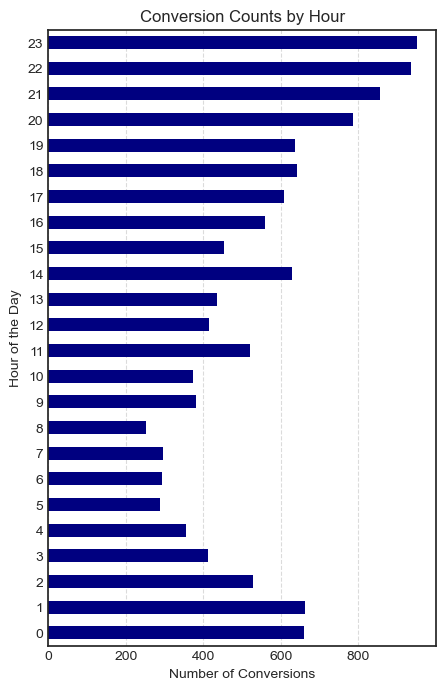

In [53]:
plt.figure(figsize=(5, 8))
conversion_by_hour.plot(kind='barh', color='navy')
plt.title('Conversion Counts by Hour')
plt.xlabel('Number of Conversions')
plt.ylabel('Hour of the Day')
plt.yticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [54]:
# CR for each state considering the total first contact of each state
total_users_by_state = data['state_fill'].value_counts()
total_converted_by_state = conversion_data['state_fill'].value_counts()
conversion_percentage_by_state = (total_converted_by_state / total_users_by_state * 100).sort_values(ascending=False)
print("Conversion percentage by state:")
conversion_percentage_by_state


Conversion percentage by state:


Vermont                 25.945946
Maine                   20.560748
New Hampshire           20.041322
Idaho                   19.951923
Kentucky                18.246687
South Dakota            17.761989
Delaware                17.129630
Michigan                16.896120
North Dakota            16.149871
Nebraska                15.613911
Nevada                  15.162455
Connecticut             14.596273
Wyoming                 14.492754
West Virginia           14.320096
Rhode Island            14.110429
Wisconsin               13.837051
Tennessee               13.519892
Iowa                    13.401684
Washington              13.124471
Alabama                 13.035714
Montana                 12.889813
Mississippi             12.506381
South Carolina          12.214765
Georgia                 11.917098
Maryland                11.882353
Arkansas                11.649519
Indiana                 11.306223
District of Columbia    11.219512
Massachusetts           11.085271
New Mexico    

In [58]:
# Guardar el resultado como un archivo CSV
conversion_percentage_by_state.to_csv('conversion_percentage_by_state.csv', header=True)


In [57]:
# Top 5 states with the highest CR divided by channel

estados_especificos = ['Vermont', 'Maine', 'New Hampshire', 'Idaho', 'Kentucky']
conversion_data_especifico = conversion_data[conversion_data['state_fill'].isin(estados_especificos)]
suma_last_medium_por_estado = conversion_data_especifico.groupby('state_fill')['last_medium'].value_counts()
print("Sum of last_medium by state:")
print(suma_last_medium_por_estado)



Sum of last_medium by state:
state_fill     last_medium
Idaho          no medium      39
               organic        15
               cpc            11
               affiliates      8
               email           6
               referral        4
Kentucky       no medium      83
               organic        34
               email          21
               affiliates     19
               cpc            16
               referral        4
               gotoweb         1
               paidsocial      1
Maine          no medium      49
               organic        24
               cpc            14
               email          11
               affiliates      8
               referral        2
               chumba_post     1
               paidsocial      1
New Hampshire  no medium      56
               organic        17
               email          10
               affiliates      6
               cpc             5
               paidsocial      2
               refer

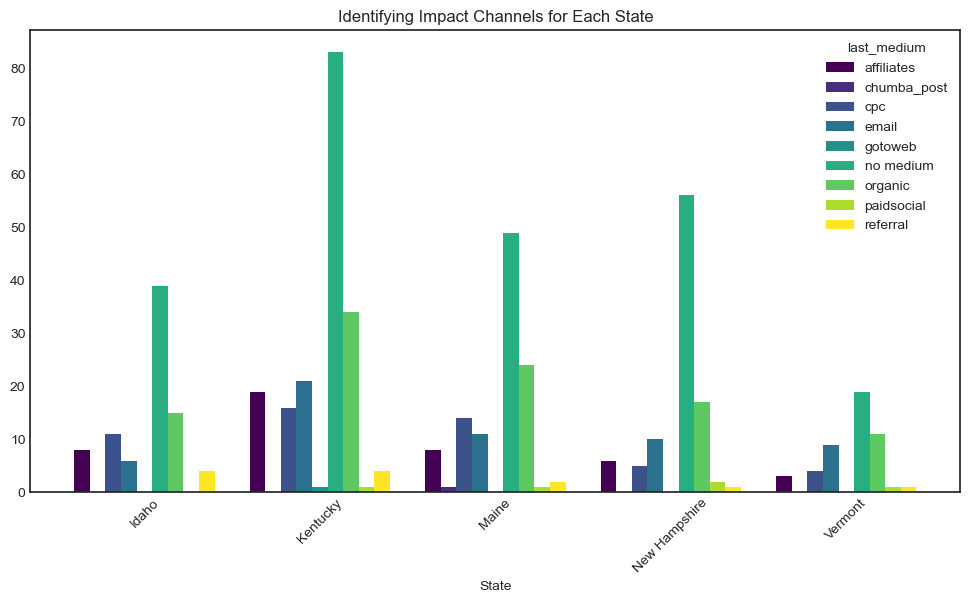

In [65]:
# Graficar los resultados como un gráfico de barras
suma_last_medium_por_estado.unstack().plot(kind='bar', figsize=(12, 6), width=0.8, align='center', cmap='viridis')
plt.title('Identifying Impact Channels for Each State')
plt.xlabel('State')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()


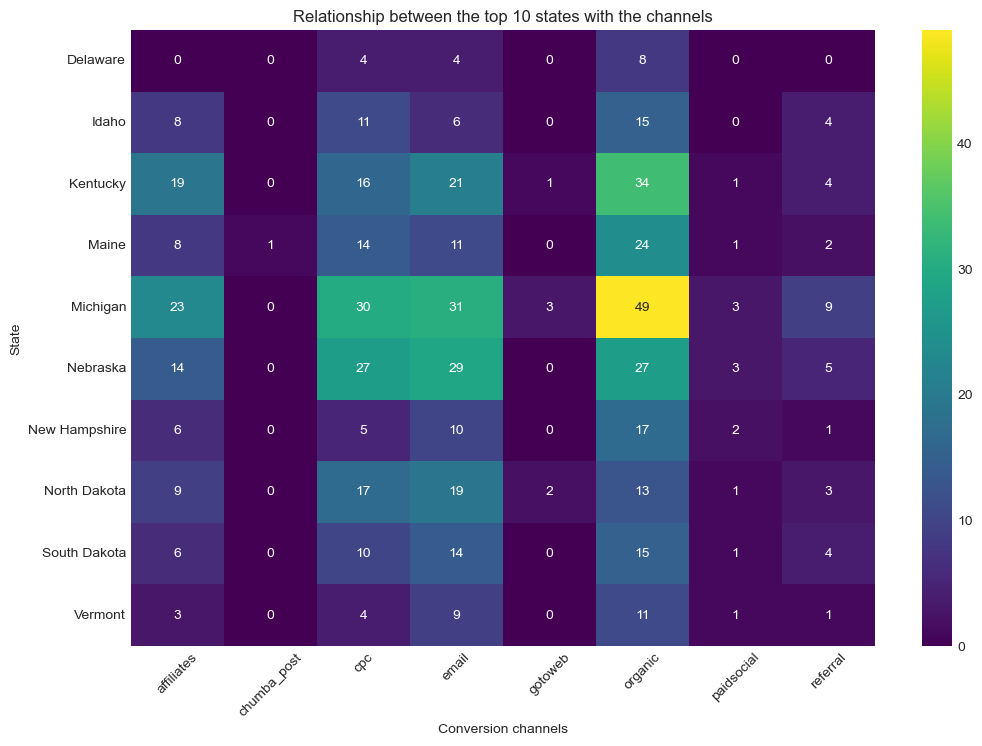

In [66]:
# New relationship between channels with the CR considering the number of contacts with each state.

top_10_states = conversion_percentage_by_state.head(10).index.tolist()

top_10_data = conversion_data[conversion_data['state_fill'].isin(top_10_states)]
top_10_data = top_10_data[top_10_data['last_medium'] != 'no medium']

contingency_table = pd.crosstab(top_10_data['state_fill'], top_10_data['last_medium'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Relationship between the top 10 states with the channels')
plt.xlabel('Conversion channels')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
